In [ ]:
# --------------------------------------------------------------START PHASE 1------------------------------------------------- TRAINING PART

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

tf.__version__

'2.9.1'

In [29]:
S = 32 # imnput shape of our model 

# rescale our images
trainDatagen = ImageDataGenerator(rescale=1./255)

testDatagen = ImageDataGenerator(rescale=
                                 1./255)
# minor image processing
train_set = trainDatagen.flow_from_directory(r'C:\Users\prakashpc\Desktop\DevanagariHandwrittenCharacterDataset\Train',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

test_set = testDatagen.flow_from_directory(
        r'C:\Users\prakashpc\Desktop\DevanagariHandwrittenCharacterDataset\Test',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


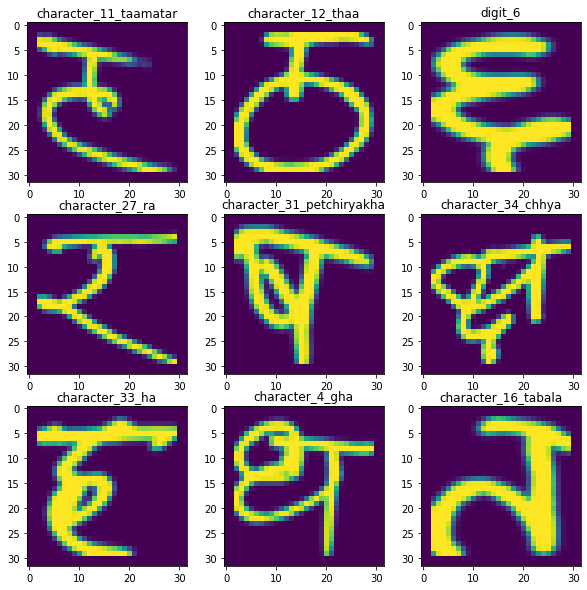

In [30]:
classes = list(train_set.class_indices.keys())
r=3
c=3
fig = plt.figure(figsize=(10, 10))
for i in range(r*c):
    plt.subplot(r, c, i+1)
    lbl = train_set[i][1][i]
    img = train_set[i][0][i]
    plt.title(classes[np.argmax(lbl)])
    plt.imshow(img.reshape(32, 32))
plt.show()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.models import model_from_json
# from tensorflow.keras.models import load_model

In [32]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 1), data_format = 'channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
import time
time1 = time.time()
history = model.fit_generator(train_set, steps_per_epoch=len(train_set),
                           epochs=10,
                           workers = 4,
                           validation_data=test_set,
                           validation_steps=10,
                           verbose = 1)
time2 = time.time()
score = model.evaluate_generator(test_set, steps=1)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Epoch 1/10
2444/2444 [==============================] - 207s 84ms/step - loss: 0.8047 - accuracy: 0.7679 - val_loss: 0.1212 - val_accuracy: 0.9688
Epoch 2/10
2444/2444 [==============================] - 140s 57ms/step - loss: 0.2553 - accuracy: 0.9220 - val_loss: 0.0623 - val_accuracy: 0.9875
Epoch 3/10
2444/2444 [==============================] - 137s 56ms/step - loss: 0.1854 - accuracy: 0.9431 - val_loss: 0.0658 - val_accuracy: 0.9688
Epoch 4/10
2444/2444 [==============================] - 133s 54ms/step - loss: 0.1508 - accuracy: 0.9526 - val_loss: 0.0420 - val_accuracy: 0.9969
Epoch 5/10
2444/2444 [==============================] - 134s 55ms/step - loss: 0.1278 - accuracy: 0.9596 - val_loss: 0.0476 - val_accuracy: 0.9812
Epoch 6/10
2444/2444 [==============================] - 132s 54ms/step - loss: 0.1136 - accuracy: 0.9645 - val_loss: 0.0200 - val_accuracy: 0.9906
Epoch 7/10
2444/2444 [==============================] - 133s 54ms/step - loss: 0.1039 - accuracy: 0.9678 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


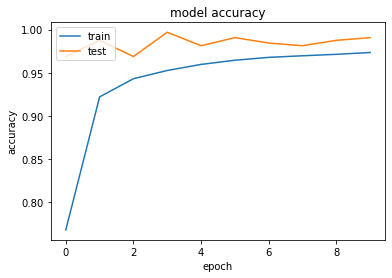

In [36]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

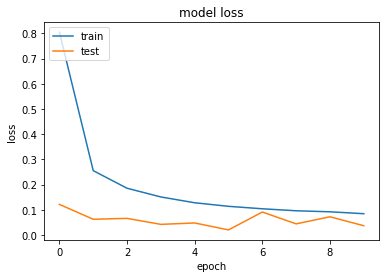

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

model_json = model.to_json()

with open("cnn.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("cnn.h5")

In [41]:
# load json and create model
json_file = open('cnn.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("cnn.h5")
print("Loaded model from disk")

loaded_model.save('cnn.hdf5')
loaded_model=load_model('cnn.hdf5')


Loaded model from disk


1/1 [==============================] - 0s 16ms/step


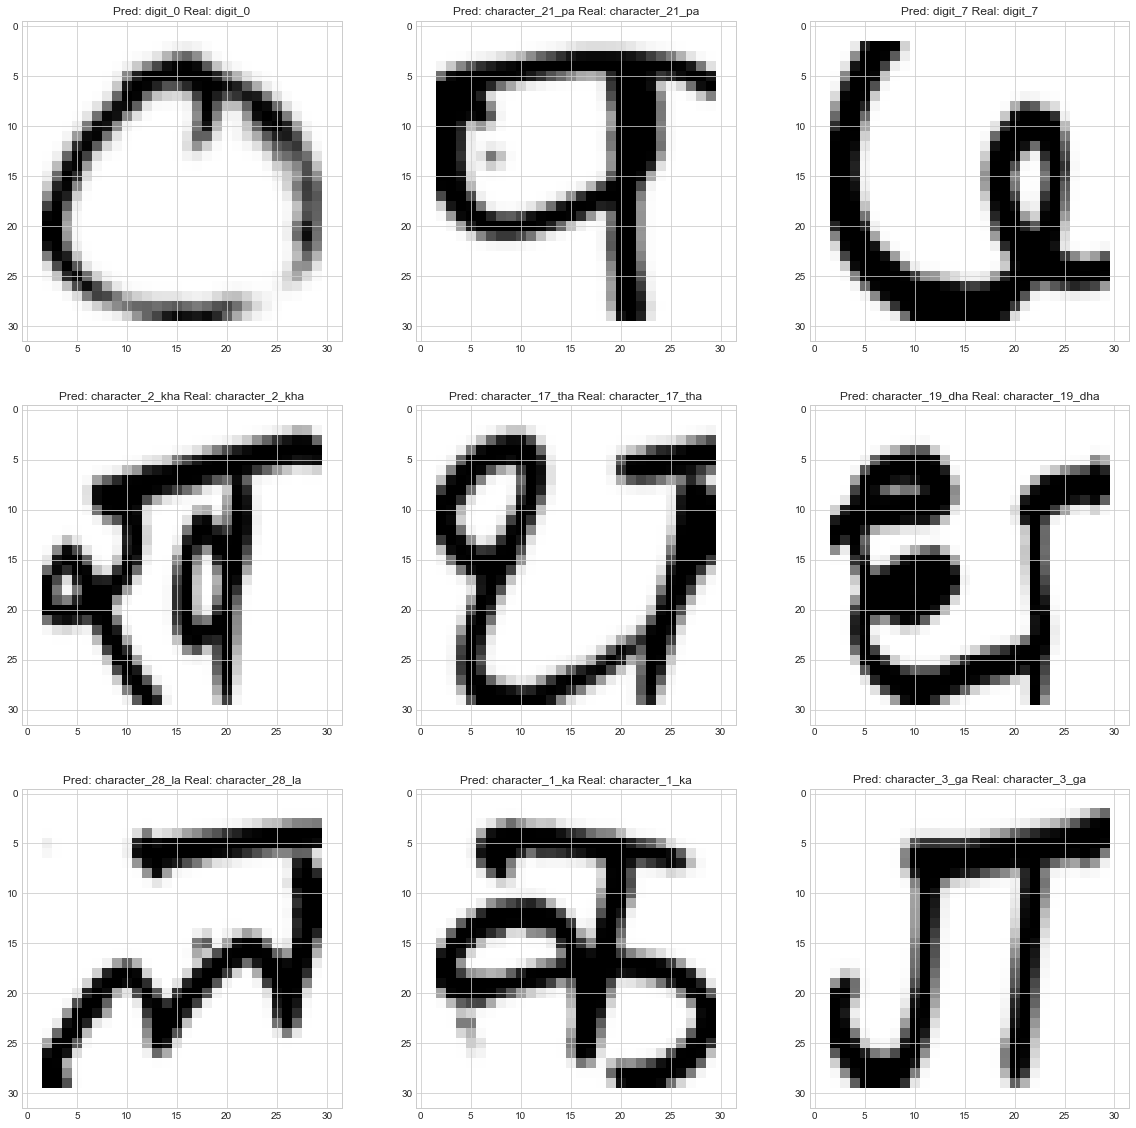

In [42]:
plt.style.use('seaborn-whitegrid')
r=3
c=3
fig = plt.figure(figsize=(20, 20))
for i in range(r*c):
    plt.subplot(r, c, i+1)
    lbl = test_set[i][1][i]
    img = test_set[i][0][i]
    img = img.reshape(1, S, S, 1)
    prediction = model.predict(img)
    prediction = np.argmax(prediction)
    title = f"Pred: {classes[prediction]} Real: {classes[np.argmax(lbl)]}"
    plt.title(title)
    plt.imshow(img.reshape(32, 32))
plt.show()

In [ ]:
#--------------------------------------------------------------------- part 2---------------------------------------- RUN MODEL FROM HERE-----------------------------------

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread('C:/Users/prakashpc/Desktop/8-BIT/Model2/images/img2.jpeg', 0)

def show(img, figsize=(20, 20)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(img, cmap="gray")
    plt.show()
show(img)


NameError: name 'cv2' is not defined

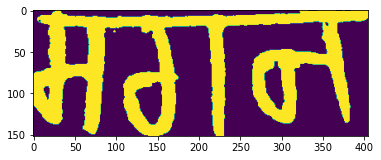

In [152]:
def borders(here_img, thresh, bthresh=0.092):
    shape = here_img.shape
    #check = int(115 * size[0] / 600)
    #check = int(55 * size[0] / 600)
    check= int(bthresh*shape[0])
    image = here_img[:]
    top, bottom = 0, shape[0] - 1
    #plt.imshow(image)
    #plt.show()

    #find the background color for empty column
    bg = np.repeat(thresh, shape[1])
    count = 0
    for row in range(1, shape[0]):
        if  (np.equal(bg, image[row]).any()) == True:
            #print(count)
            count += 1
        else:
            count = 0
        if count >= check:
            top = row - check
            break

    bg = np.repeat(thresh, shape[1])
    count = 0
    rows = np.arange(1, shape[0])
    #print(rows)
    for row in rows[::-1]:
        if  (np.equal(bg, image[row]).any()) == True:
            count += 1
        else:
            count = 0
        if count >= check:
            bottom = row + count
            break

    d1 = (top - 2) >= 0 
    d2 = (bottom + 2) < shape[0]
    d = d1 and d2
    if(d):
        b = 2
    else:
        b = 0

    return (top, bottom, b)

def preprocess(bgr_img):#gray image   
    blur = cv2.GaussianBlur(bgr_img,(5,5),0)
    ret,th_img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #converts black to white and inverse

    rows, cols = th_img.shape
    bg_test = np.array([th_img[i][i] for i in range(5)])
    if bg_test.all() == 0:
        text_color = 255
    else:
        text_color = 0

    tb = borders(th_img, text_color)
    lr = borders(th_img.T, text_color)
    dummy = int(np.average((tb[2], lr[2]))) + 2
    template = th_img[tb[0]+dummy:tb[1]-dummy, lr[0]+dummy:lr[1]-dummy]

    plt.imshow(template)
    plt.show()
    return (template, tb, lr)
prepimg, tb, lr = preprocess(img)
# print(prepimg)

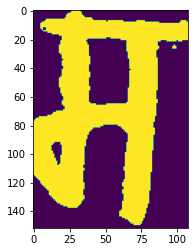

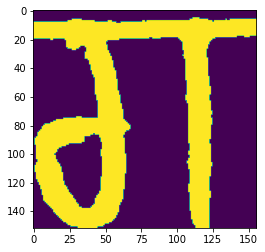

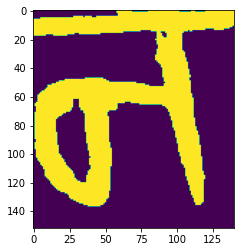

In [148]:
def segmentation(bordered, thresh=255, min_seg=10, scheck=0.15):
    try:
        shape = bordered.shape
        check = int(scheck * shape[0])
        image = bordered[:]
        image = image[check:].T
        shape = image.shape
        #plt.imshow(image)
        #plt.show()

        #find the background color for empty column
        bg = np.repeat(255 - thresh, shape[1])
        bg_keys = []
        for row in range(1, shape[0]):
            if  (np.equal(bg, image[row]).all()):
                bg_keys.append(row)            

        lenkeys = len(bg_keys)-1
        new_keys = [bg_keys[1], bg_keys[-1]]
        #print(lenkeys)
        for i in range(1, lenkeys):
            if (bg_keys[i+1] - bg_keys[i]) > check:
                new_keys.append(bg_keys[i])
                #print(i)

        new_keys = sorted(new_keys)
        #print(new_keys)
        segmented_templates = []
        first = 0
        bounding_boxes = []
        for key in new_keys[1:]:
            segment = bordered.T[first:key]
            if segment.shape[0]>=min_seg and segment.shape[1]>=min_seg:
                segmented_templates.append(segment.T)
                bounding_boxes.append((first, key))
            first = key

        last_segment = bordered.T[new_keys[-1]:]
        if last_segment.shape[0]>=min_seg and last_segment.shape[1]>=min_seg:
            segmented_templates.append(last_segment.T)
            bounding_boxes.append((new_keys[-1], new_keys[-1]+last_segment.shape[0]))

        return(segmented_templates, bounding_boxes)
    except:
        return [bordered, (0, bordered.shape[1])]
segments=segmentation(prepimg)
for simg in segments[0]:
     plt.imshow(simg)
     plt.show()

[(133, 303, 139, 247), (133, 303, 247, 403), (133, 303, 403, 543)]


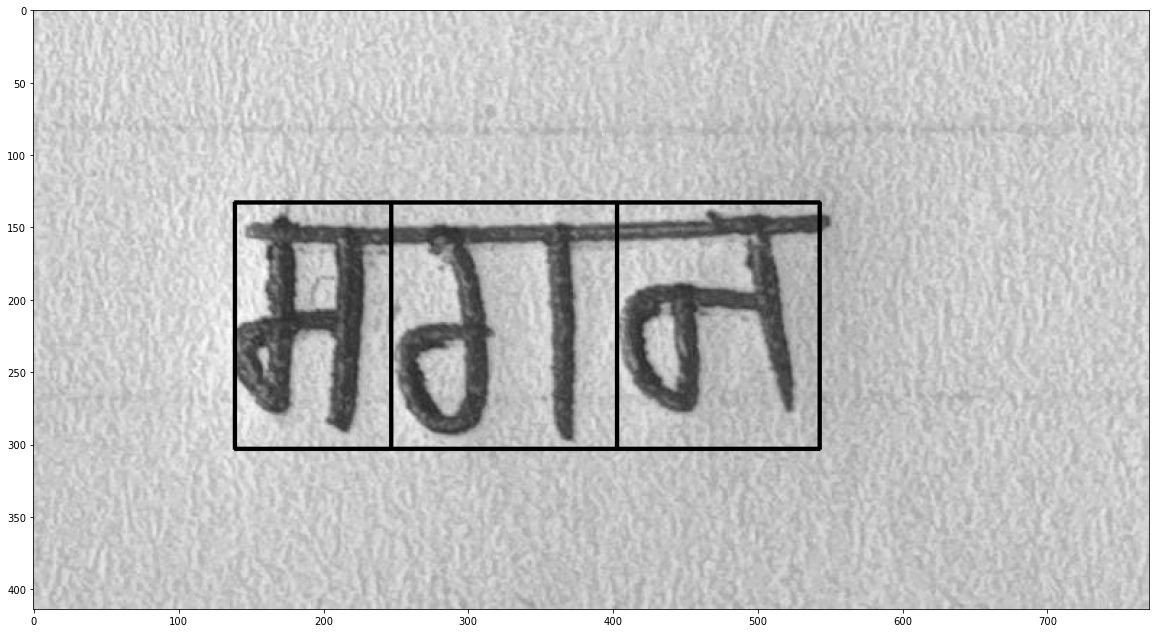

In [149]:
def localize(orig_img, tb, lr, segments):
    d=5
    rimg = orig_img.copy()
    boxes = []
    for simg, bb in zip(segments[0], segments[1]):
        bb = np.array(bb)
        bb += lr[0]
        # draw rows
        rimg[tb[0]-d:tb[0], bb[0]-d:bb[1]+d] = 0
        rimg[tb[1]:tb[1]+d, bb[0]-d:bb[1]+d] = 0

        # draw cols
        rimg[tb[0]-d:tb[1]+d, bb[0]-d:bb[0]+d] = 0
        rimg[tb[0]-d:tb[1]+d, bb[1]-d:bb[1]+d] = 0

        boxes.append((tb[0]-d, tb[1]+d, bb[0], bb[1]))
        #show(rimg)
    rimg = img.copy()
    print(boxes)
    for box in boxes:
        t, b, l, r = box
        cv2.rectangle(rimg, (l, t), (r, b), (0, 0, 0), 2)
    show(rimg)    
    return rimg, boxes
localized = localize(img, tb, lr, segments)

In [150]:
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

def prediction(img):
    # load json and create model
    json_file = open('cnn.json', 'r')

    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model.load_weights("cnn.h5")
    #print("Loaded model from disk")

    loaded_model.save('cnn.hdf5')
    loaded_model=load_model('cnn.hdf5')

    characters = '०,१,२,३,४,५,६,७,८,९,क,ख,ग,घ,ङ,च,छ,ज,झ,ञ,ट,ठ,ड,ढ,ण,त,थ,द,ध,न,प,फ,ब,भ,म,य,र,ल,व,श,ष,स,ह,क्ष,त्र,ज्ञ'
    characters = characters.split(',')

    x = np.asarray(img, dtype = np.float32).reshape(1, 32, 32, 1) / 255 

    output = loaded_model.predict(x)
    output = output.reshape(46)
    predicted = np.argmax(output)
    devanagari_label = characters[predicted]
    success = output[predicted] * 100

    return devanagari_label, success

In [151]:
def classifier(segments):
    pred_lbl = ""
    acc = []
    for segment in segments:
        segment = cv2.resize(segment, (32, 32))
        segment = cv2.GaussianBlur(segment, (3, 3), 0)
        segment = cv2.erode(segment, (3, 3), 1)
        #show(segment)

        lbl, a = prediction(segment)
        pred_lbl+=lbl
        acc.append(a)
    return pred_lbl, np.array(acc).mean()
out=classifier(segments[0])

1/1 [==============================] - 0s 70ms/step


('मगन', 93.08273593584697)

In [18]:
output=str((out)[0])


In [27]:
print(output)

शरद


In [29]:
file = open("outputsih", "w+",encoding="utf-8")
file.write(output)
file.close()

In [ ]:
# -----------------------------------------END (PHASE 1)-----------------------------------------------